In [1]:
%pip install ultralytics
!pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

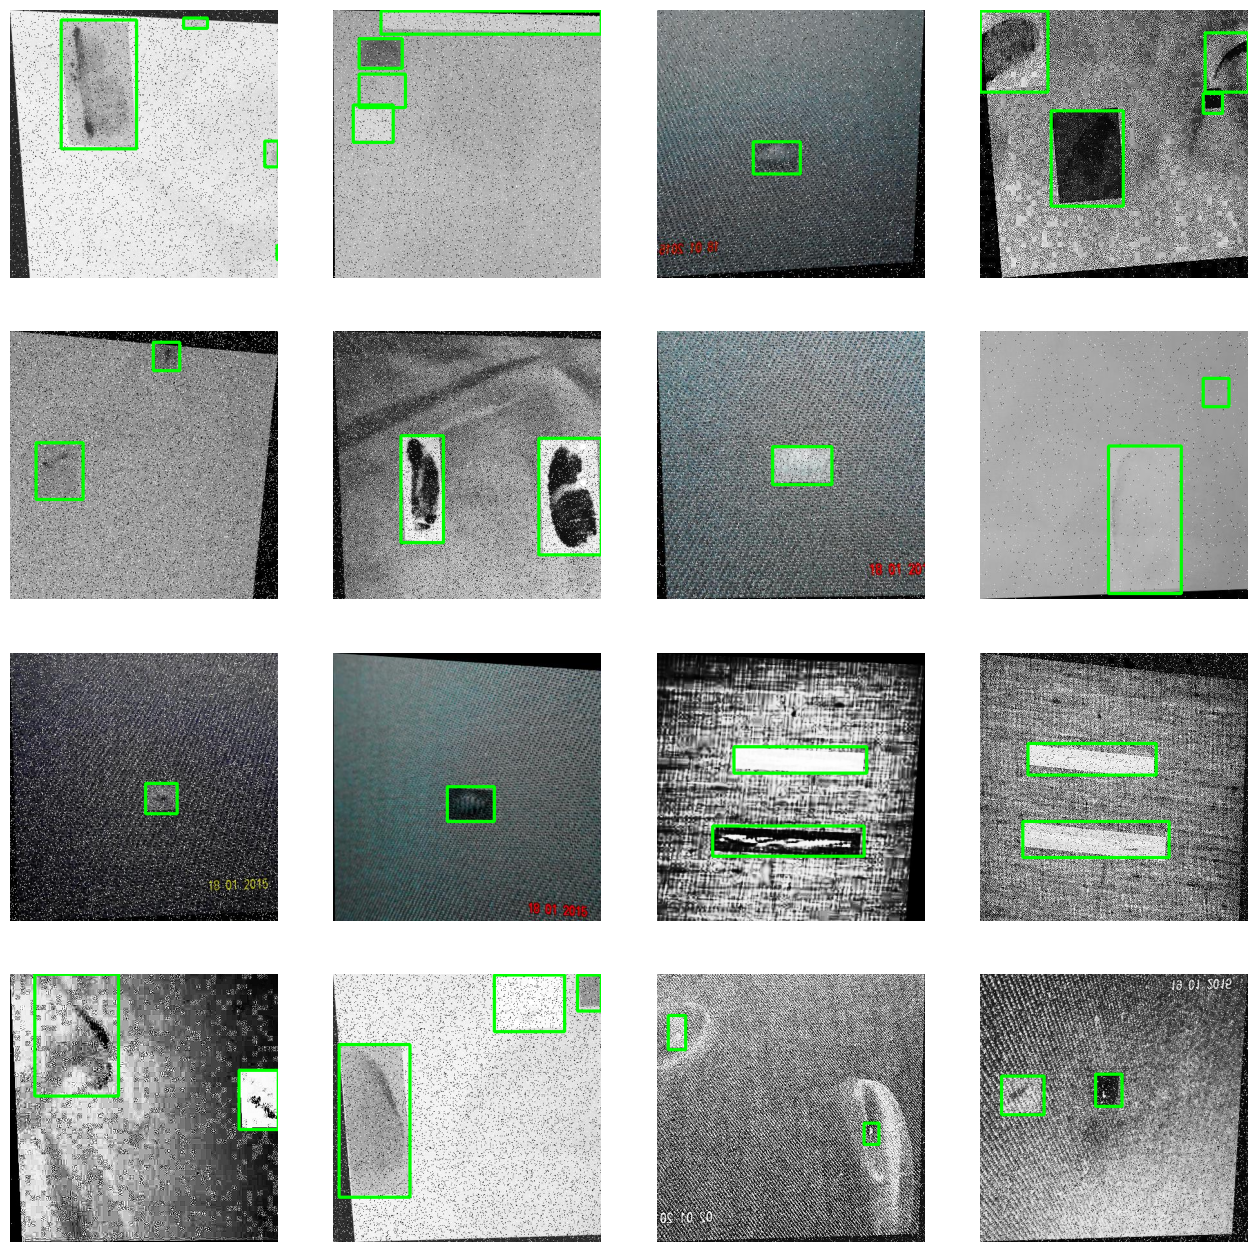

In [4]:
# Define the paths to the images and labels directories
train_images = "C:/dataset/train/images"
train_labels = "C:/dataset/train/labels"

test_images = "C:/dataset/test/images"
test_labels = "C:/dataset/test/labels"

val_images = "C:/dataset/valid/images"
val_labels = "C:/dataset/valid/labels"


# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [5]:
# Load an image using OpenCV
image = cv2.imread("C:/dataset/test/images/10_jpg.rf.72225263a9e2d52a57c092b24e6f4a32.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 416x416 and 3 channels.


In [6]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = 'C:/dataset/data.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

#model.export(format='onnx')

Ultralytics YOLOv8.1.36 🚀 Python-3.12.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=C:/dataset/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning C:\dataset\train\labels.cache... 564 images, 0 backgrounds, 0 corrupt: 100%|██████████| 564/564 [00:00<


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\dataset\valid\labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?,

Plotting labels to runs\detect\train4\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.442      2.435      1.453          7        416: 100%|██████████| 71/71 [11:32<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:04<0

                   all        124        164    0.00259      0.199    0.00118   0.000358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.569      2.179       1.59          9        416: 100%|██████████| 71/71 [11:11<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:07<0

                   all        124        164    0.00107        0.2   0.000665   0.000138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G       1.65      2.215      1.637         10        416: 100%|██████████| 71/71 [11:42<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:03<0

                   all        124        164   0.000877      0.251   0.000669   0.000194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.568      2.048       1.57         10        416: 100%|██████████| 71/71 [10:44<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:57<0

                   all        124        164    0.00354      0.162    0.00131   0.000411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.524      1.862      1.531         13        416: 100%|██████████| 71/71 [11:35<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:59<0

                   all        124        164      0.445     0.0379     0.0247    0.00526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G        1.4      1.683      1.461         13        416: 100%|██████████| 71/71 [11:29<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:58<0

                   all        124        164      0.572      0.106      0.108     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.412      1.688      1.465         18        416: 100%|██████████| 71/71 [11:36<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:58<0

                   all        124        164      0.565      0.115      0.115     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.325      1.568      1.419         13        416: 100%|██████████| 71/71 [11:37<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:59<0

                   all        124        164      0.172       0.19      0.123       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.313      1.434       1.39         11        416: 100%|██████████| 71/71 [10:45<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:54<0

                   all        124        164      0.214      0.185      0.139     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.252      1.365      1.357          5        416: 100%|██████████| 71/71 [11:50<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:00<0

                   all        124        164      0.521      0.305      0.305      0.117


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.268      1.371      1.427          8        416: 100%|██████████| 71/71 [10:46<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:54<0

                   all        124        164      0.453      0.246      0.272     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.223      1.289      1.398          4        416: 100%|██████████| 71/71 [10:47<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:54<0

                   all        124        164       0.21      0.257      0.139     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.151       1.11      1.335          4        416: 100%|██████████| 71/71 [10:49<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:54<0

                   all        124        164      0.376      0.386      0.346      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.143      1.088      1.323          4        416: 100%|██████████| 71/71 [11:51<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:59<0

                   all        124        164      0.465       0.26      0.235     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.119      1.013      1.313          6        416: 100%|██████████| 71/71 [11:26<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:58<0

                   all        124        164      0.402      0.371      0.315      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.053     0.9719      1.282          5        416: 100%|██████████| 71/71 [17:40<00:00, 14.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [14:11<0

                   all        124        164      0.296      0.265      0.182     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.9964      0.856      1.228          6        416: 100%|██████████| 71/71 [12:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:03<0

                   all        124        164      0.497      0.388       0.33      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.9793     0.8251      1.209          7        416: 100%|██████████| 71/71 [12:31<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:04<0

                   all        124        164      0.484      0.339      0.256     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.9656     0.7562      1.208          5        416: 100%|██████████| 71/71 [12:22<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:03<0

                   all        124        164      0.572      0.222      0.262      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.9239     0.7117      1.178          4        416: 100%|██████████| 71/71 [12:41<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:03<0

                   all        124        164       0.51       0.34      0.328      0.145



20 epochs completed in 4.516 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 136.7MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.36 🚀 Python-3.12.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:00<0


                   all        124        164      0.377      0.387      0.347      0.163
                  Hole        124         76      0.588      0.206      0.229        0.1
                  Knot        124         44      0.325      0.545      0.416      0.158
                 Stain        124         44      0.219      0.409      0.395      0.231
Speed: 0.8ms preprocess, 481.4ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001787FE72C30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [9]:
model = YOLO('runs/detect/train2/weights')

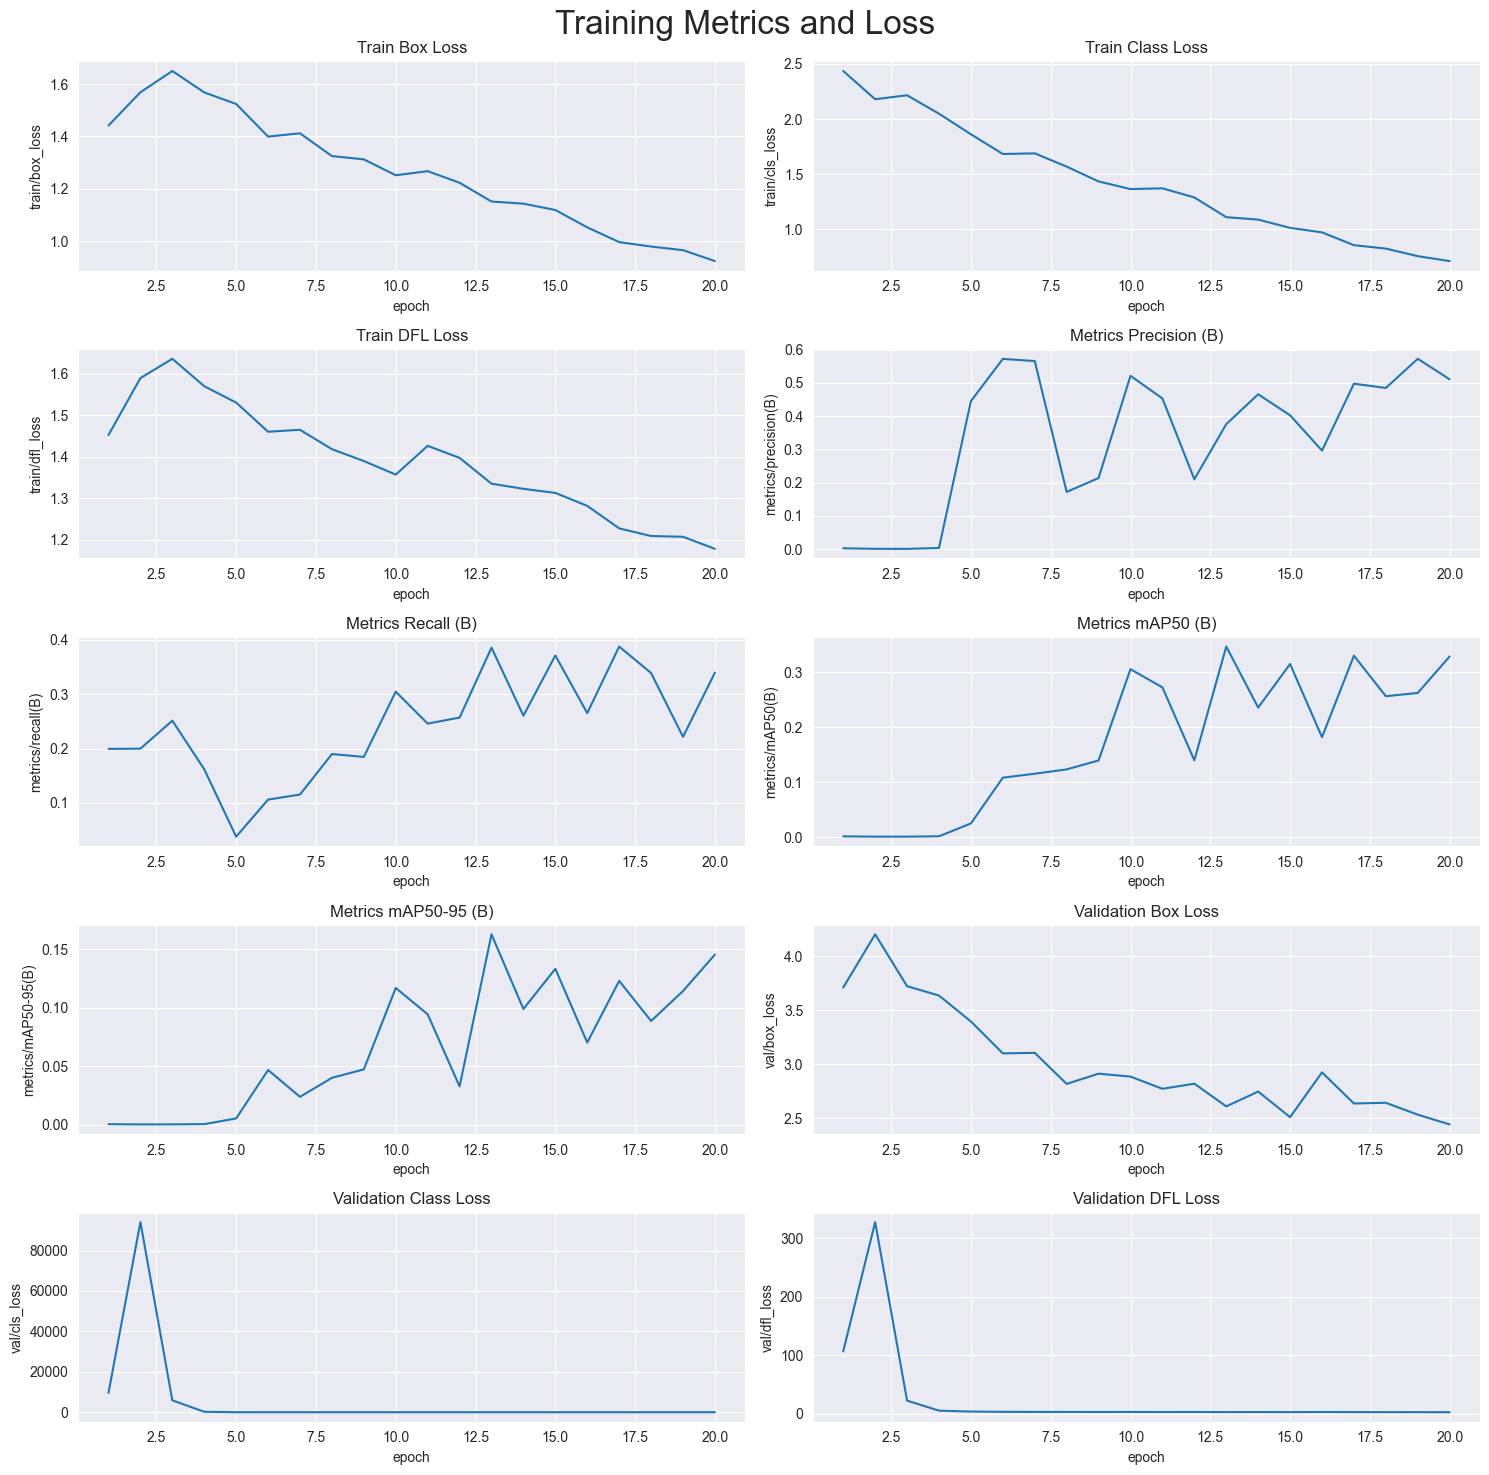

In [15]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('runs/detect/train4/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [16]:
%matplotlib inline
# Loading the best performing model
model = YOLO('runs/detect/train4/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.1.36 🚀 Python-3.12.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\dataset\test\labels... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<00:00, 703.7

val: New cache created: C:\dataset\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:39<0


                   all         88        116      0.473      0.402       0.44      0.221
                  Hole         88         48      0.684      0.271      0.468      0.192
                  Knot         88         44      0.356      0.477      0.417       0.19
                 Stain         88         24      0.379      0.458      0.435      0.281
Speed: 0.7ms preprocess, 436.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\val


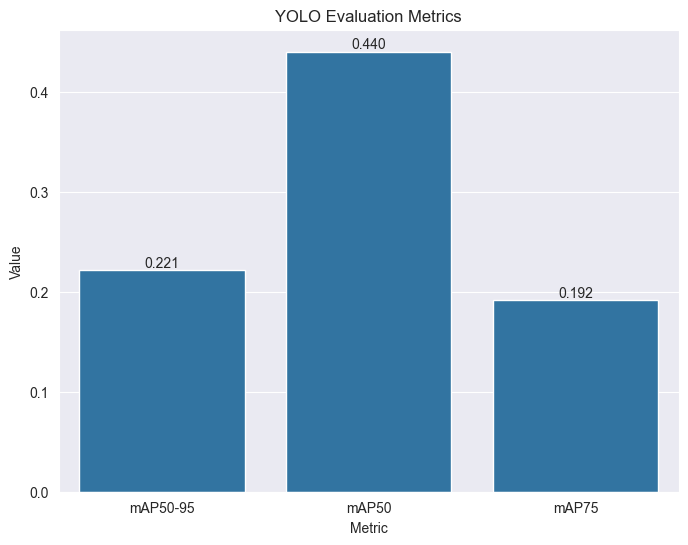

In [17]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

In [18]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('runs/detect/train4/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [19]:
# Function to perform ship detections
def defect_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img

In [20]:
import random

# Define the directory where the custom images are stored
custom_image_dir = 'C:/dataset/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = defect_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


0: 416x416 (no detections), 388.4ms
Speed: 0.0ms preprocess, 388.4ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Hole, 348.4ms
Speed: 1.1ms preprocess, 348.4ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Knot, 302.8ms
Speed: 1.0ms preprocess, 302.8ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Stain, 341.1ms
Speed: 1.0ms preprocess, 341.1ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 377.5ms
Speed: 0.0ms preprocess, 377.5ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 (no detections), 319.5ms
Speed: 0.0ms preprocess, 319.5ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 Stains, 383.8ms
Speed: 1.5ms preprocess, 383.8ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 Knot, 371.2ms
Speed: 1.1ms preprocess, 371.2ms inference, 0.0ms postproces